In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import plot_confusion_matrix, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from imblearn.over_sampling import SMOTE

df = pd.read_csv('../../../data/chocolate.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2362 non-null   int64  
 1   Company (Manufacturer)            2362 non-null   object 
 2   Company Location                  2362 non-null   object 
 3   Review Date                       2362 non-null   int64  
 4   Country of Bean Origin            2362 non-null   object 
 5   Specific Bean Origin or Bar Name  2362 non-null   object 
 6   Cocoa Percent                     2362 non-null   object 
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2362 non-null   object 
 9   Rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


## Took out the percent sign in the cocoa column, took out the , and - in the ingredients ##

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(','').str.replace(')','').str.lower()

#cocoa_percent
df = df.replace('%',' ', regex=True)

#ingredients
df = df.replace(',',' ', regex=True)
df = df.replace('-',' ', regex=True)

df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,Bejofo Estate batch 1,76,3 B S C,cocoa blackberry full body,3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,Zorzal batch 1,76,3 B S C,cocoa vegetal savory,3.50
2,2454,5150,U.S.A.,2019,Tanzania,Kokoa Kamili batch 1,76,3 B S C,rich cocoa fatty bready,3.25
3,797,A. Morin,France,2012,Peru,Peru,63,4 B S C L,fruity melon roasty,3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70,4 B S C L,vegetal nutty,3.50


### Changing Number Columns into Floats ###

In [4]:
df["cocoa_percent"] = df.cocoa_percent.astype(float)
#df["review_date"] = df.review_date.astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2362 non-null   int64  
 1   company_manufacturer              2362 non-null   object 
 2   company_location                  2362 non-null   object 
 3   review_date                       2362 non-null   int64  
 4   country_of_bean_origin            2362 non-null   object 
 5   specific_bean_origin_or_bar_name  2362 non-null   object 
 6   cocoa_percent                     2362 non-null   float64
 7   ingredients                       2274 non-null   object 
 8   most_memorable_characteristics    2362 non-null   object 
 9   rating                            2362 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 184.7+ KB


In [6]:
#ingredients have 88 rows that have no inputs.
df.isna().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         88
most_memorable_characteristics       0
rating                               0
dtype: int64

## comparing relationship to review date and rating ## 

In [7]:
average_ratings_review_date = df.groupby('review_date')['rating'].mean().sort_values().to_dict()

In [8]:
company_date_counts = df['review_date'].value_counts(normalize=True).to_dict()

In [9]:
date_range = list(range(2006, 2022))
date_range

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

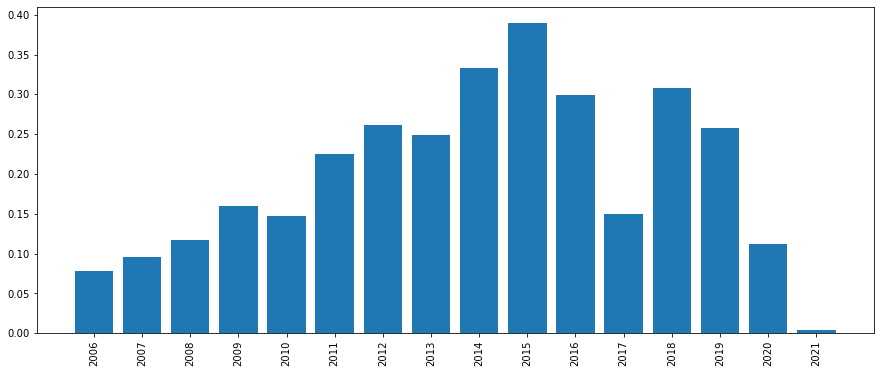

In [10]:
import matplotlib.pyplot as plt
rev_date = df.review_date.unique()
weighted_rating = []
for rev in rev_date:
    count = company_date_counts[rev]
    rating = average_ratings_review_date[rev]
    weighted_rating.append(count * rating)
    
sorted_vals = sorted(list(zip(weighted_rating, rev_date)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xticks(rotation=90, ticks=date_range);

The review date tends to fluctuate between the years. In the year 2015 it is shown to have the highest peak of rating. Years 2014,2016, and 2018 also seem to have higher rating correlation. This is interesting because these years are consistant except for in 2017 there is a drop. I am going to group these years together but leave out 2017 so it does not lower the higher averages. It looks like most ratings are consistant with a range of years and then shifts and then stays the same and then shifts. Interesting to see that they stay pretty consistent with their groupsings.

### Review Date Bin ###

In [11]:
df.review_date

0       2019
1       2019
2       2019
3       2012
4       2012
        ... 
2357    2014
2358    2017
2359    2018
2360    2018
2361    2018
Name: review_date, Length: 2362, dtype: int64

In [12]:
df.groupby('review_date').mean()['rating']

review_date
2006    3.004032
2007    3.102740
2008    3.000000
2009    3.073171
2010    3.152273
2011    3.257669
2012    3.180412
2013    3.197011
2014    3.189271
2015    3.244718
2016    3.226027
2017    3.361905
2018    3.192325
2019    3.134021
2020    3.256173
2021    3.500000
Name: rating, dtype: float64

In [13]:
#smallest rating
first_bin_date = (2006, 2007, 2008, 2010, 2017, 2020, 2021)
first_bin_date

(2006, 2007, 2008, 2010, 2017, 2020, 2021)

In [14]:
#medium rating
second_bin_date = (2009, 2011, 2012, 2013, 2019)
second_bin_date

(2009, 2011, 2012, 2013, 2019)

In [15]:
#higher rating
third_bin_date = (2014, 2015, 2016, 2018)
third_bin_date

(2014, 2015, 2016, 2018)

In [16]:
#setting variable to low rating group
bin_a_index = df[df.review_date.isin(first_bin_date)].index
df.at[bin_a_index, 'review_date_bin'] = 'a'

In [17]:
#setting variable to medium rating group
bin_b_index = df[df.review_date.isin(second_bin_date)].index
df.at[bin_b_index, 'review_date_bin'] = 'b'

In [18]:
#setting variable to higher rating group
bin_c_index = df[df.review_date.isin(third_bin_date)].index
df.at[bin_c_index, 'review_date_bin'] = 'c'

In [19]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,review_date_bin
0,2454,5150,U.S.A.,2019,Madagascar,Bejofo Estate batch 1,76.0,3 B S C,cocoa blackberry full body,3.75,b
1,2458,5150,U.S.A.,2019,Dominican Republic,Zorzal batch 1,76.0,3 B S C,cocoa vegetal savory,3.50,b
2,2454,5150,U.S.A.,2019,Tanzania,Kokoa Kamili batch 1,76.0,3 B S C,rich cocoa fatty bready,3.25,b
3,797,A. Morin,France,2012,Peru,Peru,63.0,4 B S C L,fruity melon roasty,3.75,b
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4 B S C L,vegetal nutty,3.50,b
...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,4 B S* C Sa,waxy cloying vegetal,2.75,c
2358,1996,Zotter,Austria,2017,Colombia,APROCAFA Acandi,75.0,3 B S C,strong nutty marshmallow,3.75,a
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3 B S C,muted roasty accessible,3.50,c
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3 B S C,fatty mild nuts mild fruit,3.25,c


### Cocoa Percent Bucket and Bin ###

##### mallory working on cocoa percent #####

In [20]:
#breaking down cocoa percent to 2 different groups 
df['cocoa_bucket'] = pd.qcut(df['cocoa_percent'], q=2, duplicates='drop')

In [21]:
df['cocoa_bucket']

0        (70.0, 100.0]
1        (70.0, 100.0]
2        (70.0, 100.0]
3       (41.999, 70.0]
4       (41.999, 70.0]
             ...      
2357     (70.0, 100.0]
2358     (70.0, 100.0]
2359     (70.0, 100.0]
2360    (41.999, 70.0]
2361     (70.0, 100.0]
Name: cocoa_bucket, Length: 2362, dtype: category
Categories (2, interval[float64]): [(41.999, 70.0] < (70.0, 100.0]]

In [22]:
df['cocoa_bucket'].value_counts()

(41.999, 70.0]    1335
(70.0, 100.0]     1027
Name: cocoa_bucket, dtype: int64

In [23]:
#cocoa bucket and rating
df.groupby('cocoa_bucket').mean()['rating']

cocoa_bucket
(41.999, 70.0]    3.238839
(70.0, 100.0]     3.120497
Name: rating, dtype: float64

In [24]:
#if greater than or equal to 3 then its 1 and if its less than 3 its 0
df['rating_class'] = [1 if r >= 3 else 0 for r in df['rating']]

In [25]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,review_date_bin,cocoa_bucket,rating_class
0,2454,5150,U.S.A.,2019,Madagascar,Bejofo Estate batch 1,76.0,3 B S C,cocoa blackberry full body,3.75,b,"(70.0, 100.0]",1
1,2458,5150,U.S.A.,2019,Dominican Republic,Zorzal batch 1,76.0,3 B S C,cocoa vegetal savory,3.50,b,"(70.0, 100.0]",1
2,2454,5150,U.S.A.,2019,Tanzania,Kokoa Kamili batch 1,76.0,3 B S C,rich cocoa fatty bready,3.25,b,"(70.0, 100.0]",1
3,797,A. Morin,France,2012,Peru,Peru,63.0,4 B S C L,fruity melon roasty,3.75,b,"(41.999, 70.0]",1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4 B S C L,vegetal nutty,3.50,b,"(41.999, 70.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,4 B S* C Sa,waxy cloying vegetal,2.75,c,"(70.0, 100.0]",0
2358,1996,Zotter,Austria,2017,Colombia,APROCAFA Acandi,75.0,3 B S C,strong nutty marshmallow,3.75,a,"(70.0, 100.0]",1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3 B S C,muted roasty accessible,3.50,c,"(70.0, 100.0]",1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3 B S C,fatty mild nuts mild fruit,3.25,c,"(41.999, 70.0]",1


### comparing cocoa bucket with rating class ###

In [26]:
import seaborn as sns

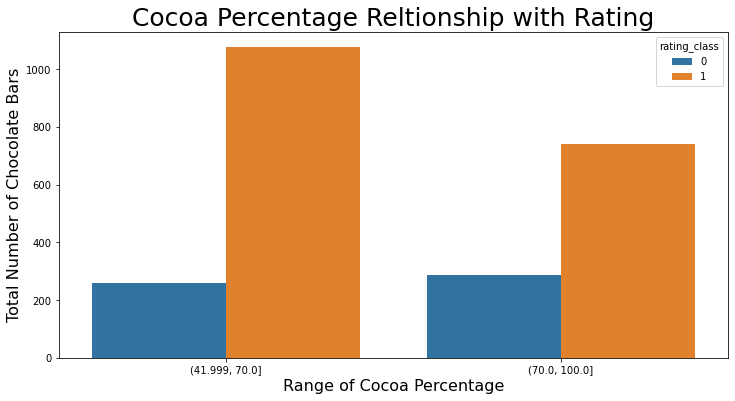

In [27]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='cocoa_bucket',data=df, hue='rating_class', ax=ax)

plt.xlabel('Range of Cocoa Percentage', fontsize=16)
plt.ylabel('Total Number of Chocolate Bars', fontsize=16)
plt.title('Cocoa Percentage Reltionship with Rating', fontsize=25);

the X-label indicates the range of cocoa percentage 
the Y-label indicated the number of times each cocoa percentage
the Hue indicates 1 as a High Rating and 0 as a Low Rating


### Country of Bean Origin ###

In [28]:
df['country_of_bean_origin'].value_counts()

Venezuela              246
Peru                   223
Ecuador                216
Dominican Republic     211
Madagascar             168
                      ... 
Sumatra                  1
Burma                    1
Sulawesi                 1
Sao Tome & Principe      1
Suriname                 1
Name: country_of_bean_origin, Length: 61, dtype: int64

In [29]:
#country bean origin and rating
average_ratings_bean_origin = df.groupby('country_of_bean_origin')['rating'].mean().sort_values().to_dict()


In [30]:
bean_origin_counts = df['country_of_bean_origin'].value_counts(normalize=True).to_dict()

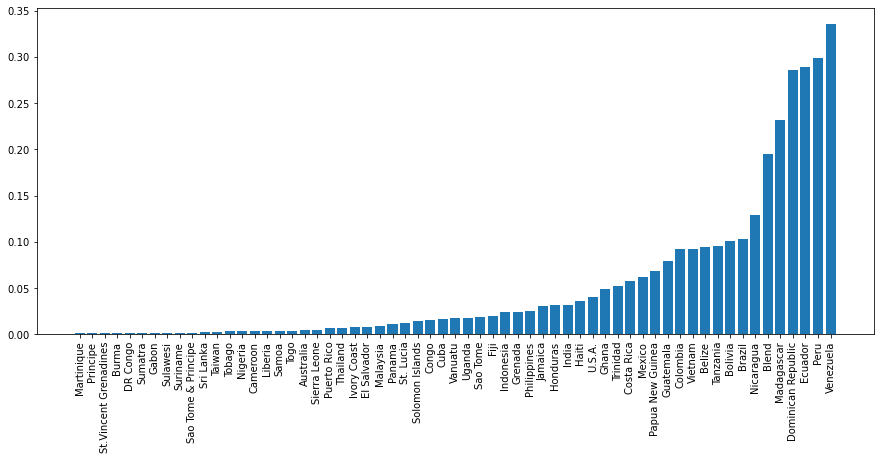

In [31]:
import matplotlib.pyplot as plt
bean_origin = df.country_of_bean_origin.unique()
weighted_rating = []
for bean in bean_origin:
    count = bean_origin_counts[bean]
    rating = average_ratings_bean_origin[bean]
    weighted_rating.append(count * rating)
    
sorted_vals = sorted(list(zip(weighted_rating, bean_origin)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xticks(rotation=90);

This visual of country bean of origin is pretty streamline. Background knowledge of chocolate beans is that that it likes to grow in a hot environment which lines up with the graph above. Venezuela as a bean origin is the highest. I am going to do 5 different groups including: the very low countries of Martinique to Solomon Islands and then there is a handful of countries that produce beans but do not provide an average of high rankings which are the countries of Congo to Guatemala, then there seems to be another small raise in rankings from Columbia to Nicaragua and the final grouping of the highest ranking average of bean origins seems to be from Blend to Venezuela. With these combinations I am going to create bins to group the origins together by average increase of ranking averages.

In [32]:
#first bin from Martinique to Solomon Islands
first_bin_origin = x[:28]
first_bin_origin

['Martinique',
 'Principe',
 'St.Vincent Grenadines',
 'Burma',
 'DR Congo',
 'Sumatra',
 'Gabon',
 'Sulawesi',
 'Suriname',
 'Sao Tome & Principe',
 'Sri Lanka',
 'Taiwan',
 'Tobago',
 'Nigeria',
 'Cameroon',
 'Liberia',
 'Samoa',
 'Togo',
 'Australia',
 'Sierra Leone',
 'Puerto Rico',
 'Thailand',
 'Ivory Coast',
 'El Salvador',
 'Malaysia',
 'Panama',
 'St. Lucia',
 'Solomon Islands']

In [33]:
'Guatemala' in x

True

In [34]:
df['bean_origin_bin'] = 1
bin_a_index = df[df.country_of_bean_origin.isin(first_bin_origin)].index
df.at[bin_a_index, 'bean_origin_bin'] = 'a'

In [35]:
#second to Guatemala
idx = x.index('Guatemala') + 1
second_bin_origin = x[28:idx]
bin_b_index = df[df.country_of_bean_origin.isin(second_bin_origin)].index
df.at[bin_b_index, 'bean_origin_bin'] = 'b'

In [36]:
#third to Nicaragua
idx2 = x.index('Nicaragua')+1
third_bin_origin = x[idx:idx2]
bin_c_index = df[df.country_of_bean_origin.isin(third_bin_origin)].index
df.at[bin_c_index, 'bean_origin_bin'] = 'c'

In [37]:
#fourth to Venezuela
idx3 = x.index('Blend')
fourth_bin_origin = x[idx3:]
bin_d_index = df[df.country_of_bean_origin.isin(fourth_bin_origin)].index
df.at[bin_d_index, 'bean_origin_bin'] = 'd'

In [38]:
df['bean_origin_bin'].value_counts()

d    1216
b     532
c     518
a      96
Name: bean_origin_bin, dtype: int64

In [39]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,review_date_bin,cocoa_bucket,rating_class,bean_origin_bin
0,2454,5150,U.S.A.,2019,Madagascar,Bejofo Estate batch 1,76.0,3 B S C,cocoa blackberry full body,3.75,b,"(70.0, 100.0]",1,d
1,2458,5150,U.S.A.,2019,Dominican Republic,Zorzal batch 1,76.0,3 B S C,cocoa vegetal savory,3.50,b,"(70.0, 100.0]",1,d
2,2454,5150,U.S.A.,2019,Tanzania,Kokoa Kamili batch 1,76.0,3 B S C,rich cocoa fatty bready,3.25,b,"(70.0, 100.0]",1,c
3,797,A. Morin,France,2012,Peru,Peru,63.0,4 B S C L,fruity melon roasty,3.75,b,"(41.999, 70.0]",1,d
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4 B S C L,vegetal nutty,3.50,b,"(41.999, 70.0]",1,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,4 B S* C Sa,waxy cloying vegetal,2.75,c,"(70.0, 100.0]",0,d
2358,1996,Zotter,Austria,2017,Colombia,APROCAFA Acandi,75.0,3 B S C,strong nutty marshmallow,3.75,a,"(70.0, 100.0]",1,c
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3 B S C,muted roasty accessible,3.50,c,"(70.0, 100.0]",1,c
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3 B S C,fatty mild nuts mild fruit,3.25,c,"(41.999, 70.0]",1,b


### specific bean origin or bar name ###

In [40]:
df['specific_bean_origin_or_bar_name'].value_counts()

Madagascar                       55
Ecuador                          43
Peru                             40
Dominican Republic               37
Chuao                            25
                                 ..
Maya Mtn  Batch 454  Heirloom     1
Marcial  single Cote  2012        1
Akessons  Sambirano Valley        1
Diego/ original micro             1
Congo  Gorilla bar                1
Name: specific_bean_origin_or_bar_name, Length: 1475, dtype: int64

In [41]:
#specific bean origin bar name and rating
average_ratings_bean_origin_bar_name = df.groupby('specific_bean_origin_or_bar_name')['rating'].mean().sort_values().to_dict()

In [42]:
bean_origin_bar_name_counts = df['specific_bean_origin_or_bar_name'].value_counts(normalize=True).to_dict()

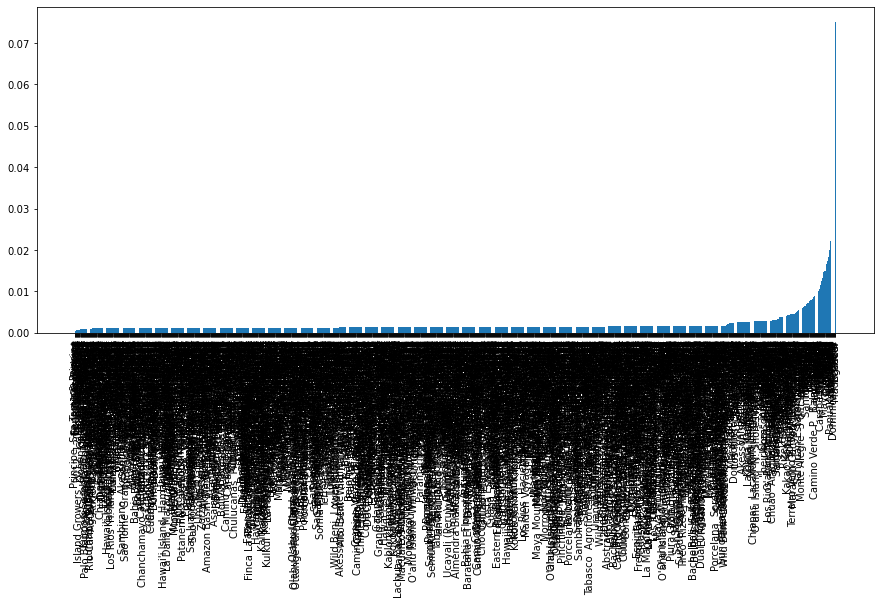

In [43]:
import matplotlib.pyplot as plt
origin_bar = df.specific_bean_origin_or_bar_name.unique()
weighted_rating = []
for origin in origin_bar:
    count = bean_origin_bar_name_counts[origin]
    rating = average_ratings_bean_origin_bar_name[origin]
    weighted_rating.append(count * rating)
    
sorted_vals = sorted(list(zip(weighted_rating, origin_bar)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xticks(rotation=90);

This is obviously a hot mess!!! This graph is showing where the bean origins are specifically showing where they are being made given the specific bar name. This is a lot of information and it is not extremely necessary to look at the specific areas within the country that the specific chocolate bars are being made. The specific data points are producing different ways the information is given and how specific the information is. Some of the points just repeat the country and do not give more details, others go super specific and give the bar name and even what batch it was in, others give the batch it was in and then follow by the bar name. This column is very unorganized and it is not necessarily worth it to go through and spend the time cleaning it. Decision has been made to drop the column

### company_(manufacturer) ###

In [44]:
df['company_manufacturer'].value_counts()

Soma             52
Arete            32
Fresco           31
Bonnat           29
Pralus           25
                 ..
Pinellas          1
The Barn          1
Lilla             1
Luisa's Vegan     1
Tree to Bar       1
Name: company_manufacturer, Length: 552, dtype: int64

In [45]:
#company manufacturer and rating
average_ratings_company_manufacturer = df.groupby('company_manufacturer')['rating'].mean().sort_values().to_dict()

In [46]:
company_manudacturer_counts = df['company_manufacturer'].value_counts(normalize=True).to_dict()

In [47]:
df['company_manufacturer'].value_counts()

Soma             52
Arete            32
Fresco           31
Bonnat           29
Pralus           25
                 ..
Pinellas          1
The Barn          1
Lilla             1
Luisa's Vegan     1
Tree to Bar       1
Name: company_manufacturer, Length: 552, dtype: int64

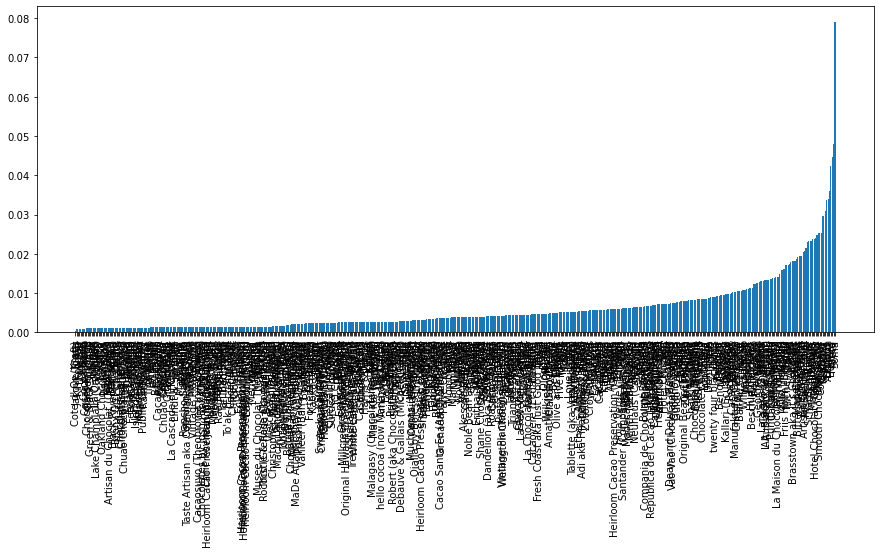

In [48]:
import matplotlib.pyplot as plt
comp_manufacturer = df['company_manufacturer'].unique()
weighted_rating = []
for comp in comp_manufacturer:
    count = company_manudacturer_counts[comp]
    rating = average_ratings_company_manufacturer[comp]
    weighted_rating.append(count * rating)
    
sorted_vals = sorted(list(zip(weighted_rating, comp_manufacturer)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xticks(rotation=90);

In [49]:
df['comp_manufact_bin'] = 1

In [50]:
first_bin = x[:200]


bin_a_index = df[df.company_manufacturer.isin(first_bin)].index
df.at[bin_a_index, 'comp_manufact_bin'] = 'a'

In [51]:
second_bin = x[200:350]

bin_b_index = df[df.company_manufacturer.isin(second_bin)].index
df.at[bin_b_index, 'comp_manufact_bin'] = 'b'

In [52]:
third_bin = x[350:451]

bin_c_index = df[df.company_manufacturer.isin(third_bin)].index
df.at[bin_c_index, 'comp_manufact_bin'] = 'c'

In [53]:
fourth_bin = x[451:]

bin_d_index = df[df.company_manufacturer.isin(fourth_bin)].index
df.at[bin_d_index, 'comp_manufact_bin'] = 'd'

In [54]:
df.comp_manufact_bin.value_counts()

d    1206
c     485
b     422
a     249
Name: comp_manufact_bin, dtype: int64

In [55]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,review_date_bin,cocoa_bucket,rating_class,bean_origin_bin,comp_manufact_bin
0,2454,5150,U.S.A.,2019,Madagascar,Bejofo Estate batch 1,76.0,3 B S C,cocoa blackberry full body,3.75,b,"(70.0, 100.0]",1,d,b
1,2458,5150,U.S.A.,2019,Dominican Republic,Zorzal batch 1,76.0,3 B S C,cocoa vegetal savory,3.50,b,"(70.0, 100.0]",1,d,b
2,2454,5150,U.S.A.,2019,Tanzania,Kokoa Kamili batch 1,76.0,3 B S C,rich cocoa fatty bready,3.25,b,"(70.0, 100.0]",1,c,b
3,797,A. Morin,France,2012,Peru,Peru,63.0,4 B S C L,fruity melon roasty,3.75,b,"(41.999, 70.0]",1,d,d
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4 B S C L,vegetal nutty,3.50,b,"(41.999, 70.0]",1,c,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,4 B S* C Sa,waxy cloying vegetal,2.75,c,"(70.0, 100.0]",0,d,d
2358,1996,Zotter,Austria,2017,Colombia,APROCAFA Acandi,75.0,3 B S C,strong nutty marshmallow,3.75,a,"(70.0, 100.0]",1,c,d
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3 B S C,muted roasty accessible,3.50,c,"(70.0, 100.0]",1,c,d
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3 B S C,fatty mild nuts mild fruit,3.25,c,"(41.999, 70.0]",1,b,d


### comparing company manufacturer with rating class ###

<AxesSubplot:xlabel='comp_manufact_bin', ylabel='count'>

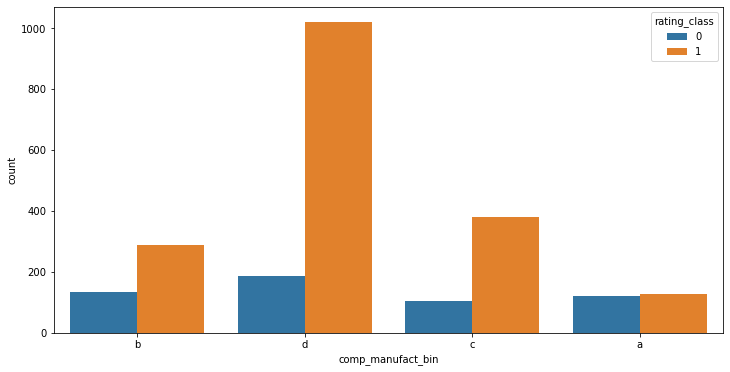

In [56]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(data=df, x='comp_manufact_bin', hue='rating_class', ax=ax)

The rating of 3 or above is occuring more often than less than 3 in all of the manufacture bins. The grouping with ratings of 3 or above occuring the most often is group d and the group with the least amount is group a. Group a tends to encompass a lot of countries that do not have the right climate to allow cocoa plants to prosper, group d tends to have countries who have super warm climates and are closest to the equator which is prime condition for cocoa plants to grow and survive.

### Creating ingredient list column from Mallory ###

In [57]:
# retreiving rows from the third index and on - leaving out rows with empty values
df['ingredient_list'] = [np.nan if l is np.nan else l[3:] for l in df['ingredients']]

In [59]:
# leaving out occurances below 8
most_common = (df['ingredient_list'].value_counts()).iloc[:9].index
df = df[df['ingredient_list'].isin(most_common)]

In [60]:
df

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,review_date_bin,cocoa_bucket,rating_class,bean_origin_bin,comp_manufact_bin,ingredient_list
0,2454,5150,U.S.A.,2019,Madagascar,Bejofo Estate batch 1,76.0,3 B S C,cocoa blackberry full body,3.75,b,"(70.0, 100.0]",1,d,b,B S C
1,2458,5150,U.S.A.,2019,Dominican Republic,Zorzal batch 1,76.0,3 B S C,cocoa vegetal savory,3.50,b,"(70.0, 100.0]",1,d,b,B S C
2,2454,5150,U.S.A.,2019,Tanzania,Kokoa Kamili batch 1,76.0,3 B S C,rich cocoa fatty bready,3.25,b,"(70.0, 100.0]",1,c,b,B S C
3,797,A. Morin,France,2012,Peru,Peru,63.0,4 B S C L,fruity melon roasty,3.75,b,"(41.999, 70.0]",1,d,d,B S C L
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4 B S C L,vegetal nutty,3.50,b,"(41.999, 70.0]",1,c,d,B S C L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,4 B S* C Sa,waxy cloying vegetal,2.75,c,"(70.0, 100.0]",0,d,d,B S* C Sa
2358,1996,Zotter,Austria,2017,Colombia,APROCAFA Acandi,75.0,3 B S C,strong nutty marshmallow,3.75,a,"(70.0, 100.0]",1,c,d,B S C
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3 B S C,muted roasty accessible,3.50,c,"(70.0, 100.0]",1,c,d,B S C
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3 B S C,fatty mild nuts mild fruit,3.25,c,"(41.999, 70.0]",1,b,d,B S C


### Final Train Test Split ###

In [200]:
# dropping the target (y) values from x and specific origin
features = df.drop(['rating','specific_bean_origin_or_bar_name', 'ingredients', 'ref', 'review_date', 'cocoa_percent', 'company_manufacturer', 'country_of_bean_origin', 'company_location', 'most_memorable_characteristics', 'rating_class'], axis =1)
X = features
y = df.rating_class

In [201]:
#performing train test split for test set (subsets 1/3)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=42)


#performing a train test split for train and validation set (subsets - 3/3)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=42) 

In [213]:
X_train

,review_date_bin,cocoa_bucket,bean_origin_bin,comp_manufact_bin,ingredient_list
1327,a,"(41.999, 70.0]",d,c,B S C V L
1535,a,"(70.0, 100.0]",d,b,B S
1612,a,"(41.999, 70.0]",b,d,B S
1293,a,"(70.0, 100.0]",d,a,B S C V
860,b,"(41.999, 70.0]",d,d,B S C
...,...,...,...,...,...
2043,a,"(41.999, 70.0]",c,d,B S C
1978,b,"(41.999, 70.0]",b,b,B S C
1169,b,"(41.999, 70.0]",d,c,B S C
826,a,"(41.999, 70.0]",b,b,B S C


### One Hot Encode Ingredient List ###

In [185]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [206]:
# fit on training categorical data
ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train)
X_val_encoded = ohe.transform(X_val)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df= pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())
X_val_encoded_df

,x0_a,x0_b,x0_c,"x1_(41.999, 70.0]","x1_(70.0, 100.0]",x2_a,x2_b,x2_c,x2_d,x3_a,...,x3_d,x4_B S,x4_B S C,x4_B S C L,x4_B S C V,x4_B S C V L,x4_B S L,x4_B S*,x4_B S* C,x4_B S* C Sa
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
281,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
X_train_encoded_df

,x0_a,x0_b,x0_c,"x1_(41.999, 70.0]","x1_(70.0, 100.0]",x2_a,x2_b,x2_c,x2_d,x3_a,...,x3_d,x4_B S,x4_B S C,x4_B S C L,x4_B S C V,x4_B S C V L,x4_B S L,x4_B S*,x4_B S* C,x4_B S* C Sa
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1607,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
X_val_df

,cocoa_bucket,rating_class,x0_a,x0_b,x0_c,x1_a,x1_b,x1_c,x1_d,x2_a,...,x2_d,x3_B S,x3_B S C,x3_B S C L,x3_B S C V,x3_B S C V L,x3_B S L,x3_B S*,x3_B S* C,x3_B S* C Sa
0,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(41.999, 70.0]",1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,"(41.999, 70.0]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2350,"(41.999, 70.0]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,"(70.0, 100.0]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,"(41.999, 70.0]",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
X_train_df = pd.concat([X_train, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val, X_val_encoded_df], axis=1)

In [190]:
X_train_df

,review_date_bin,cocoa_bucket,rating_class,bean_origin_bin,comp_manufact_bin,ingredient_list,x0_a,x0_b,x0_c,x1_a,...,x3_B S C,x3_B S C L,x3_B S C V,x3_B S C V L,x3_B S L,x3_B S*,x3_B S* C,x3_B S* C Sa,"x4_(41.999, 70.0]","x4_(70.0, 100.0]"
0,b,"(70.0, 100.0]",1.0,d,b,B S C,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,b,"(70.0, 100.0]",1.0,d,b,B S C,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,b,"(70.0, 100.0]",1.0,c,b,B S C,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,b,"(41.999, 70.0]",1.0,d,d,B S C L,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,b,"(70.0, 100.0]",1.0,d,d,B S* C Sa,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2356,b,"(70.0, 100.0]",1.0,b,d,B S* C Sa,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2357,c,"(70.0, 100.0]",0.0,d,d,B S* C Sa,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2358,a,"(70.0, 100.0]",1.0,c,d,B S C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
X_train_df = X_train_df.drop(['review_date_bin','bean_origin_bin','comp_manufact_bin','ingredient_list','cocoa_bucket'], axis=1)
X_val_df = X_val_df.drop(['review_date_bin','bean_origin_bin','comp_manufact_bin','ingredient_list','cocoa_bucket'], axis=1)

In [192]:
X_train_df.dtypes

rating_class         float64
x0_a                 float64
x0_b                 float64
x0_c                 float64
x1_a                 float64
x1_b                 float64
x1_c                 float64
x1_d                 float64
x2_a                 float64
x2_b                 float64
x2_c                 float64
x2_d                 float64
x3_B S               float64
x3_B S C             float64
x3_B S C L           float64
x3_B S C V           float64
x3_B S C V L         float64
x3_B S L             float64
x3_B S*              float64
x3_B S* C            float64
x3_B S* C Sa         float64
x4_(41.999, 70.0]    float64
x4_(70.0, 100.0]     float64
dtype: object

### Baseline Logistic Regression ###

In [261]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [210]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [262]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training score: ', f1_score(y_train, train_preds))
    print('Validation score: ', f1_score(y_val, val_preds))

    # return fitted model
    return model

In [263]:
# call modeling function
logreg = modeling_function(logreg, X_train_encoded_df, y_train, X_val_encoded_df, y_val)

Training score:  0.873653984206748
Validation score:  0.8951612903225806


### Confusion Matrix ###

In [264]:
from sklearn.metrics import plot_confusion_matrix

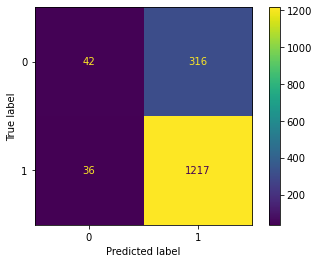

In [265]:
plot_confusion_matrix(logreg, X_train_encoded_df, y_train)

In [266]:
y_train.value_counts()

1    1253
0     358
Name: rating_class, dtype: int64

##### SMOTE #####

to help fix this class imbalance and hopefully improve the model.

In [267]:
from imblearn.over_sampling import SMOTE

In [268]:
sm = SMOTE(random_state=42)

In [269]:
X_train_res, y_train_res = sm.fit_resample(X_train_encoded_df, y_train)

In [270]:
y_train_res.value_counts()

1    1253
0    1253
Name: rating_class, dtype: int64

### Second LogisticRegression ###

the class imbalance has been fixed!!

In [271]:
# Instantiate second LogisticRegression
logreg2 = LogisticRegression(solver='liblinear')

In [272]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

In [273]:
# call modeling function
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.6671785028790786
Validation score:  0.7775061124694377


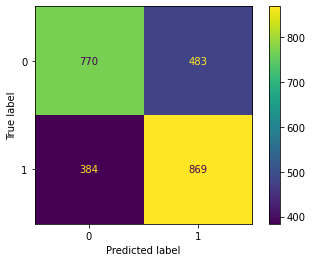

In [274]:
plot_confusion_matrix(logreg2, X_train_res, y_train_res)

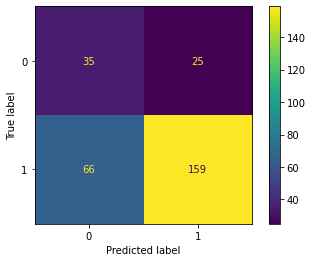

In [275]:
plot_confusion_matrix(logreg2, X_val_encoded_df, y_val)

## Third LogisticRegression ##

#### adding hyperperameters

In [276]:
logreg3 = LogisticRegression(solver='liblinear', penalty='l1', C=.75)

In [277]:
# Call modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.6725123903926802
Validation score:  0.7893462469733655


In [278]:
#logistic regression = bad

## --------------

### Decision Tree Time!!!

In [279]:
dt = DecisionTreeClassifier(random_state=42, max_depth=2)

In [280]:
dt = modeling_function(dt, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.6937916520519115
Validation score:  0.8428246013667425


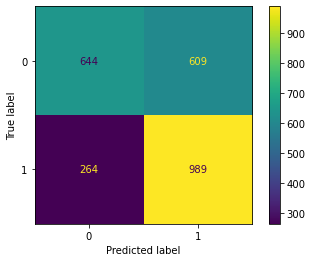

In [281]:
plot_confusion_matrix(dt, X_train_res, y_train_res)

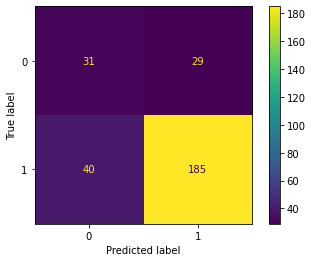

In [282]:
plot_confusion_matrix(dt, X_val_encoded_df, y_val)

##### Decision Tree with Hyperperameters

In [283]:
dt2 = DecisionTreeClassifier(random_state=42, max_depth=10, criterion='entropy', min_samples_leaf=5)

In [284]:
dt2 = modeling_function(dt2, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.7794871794871795
Validation score:  0.7981220657276995


### GridSearchCV

In [307]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [309]:
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2,3,4,5,6,7,8,9,10], 'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14]}
dt3 = DecisionTreeClassifier()
dt3_gs = GridSearchCV(estimator=dt3, param_grid=param_grid, scoring=None)
dt3_gs.fit(X_train_res,  y_train_res)
best_params = dt3_gs.best_params_
best_params

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 14}

In [310]:
dt3_gs = modeling_function(dt3_gs, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.7174651075066013
Validation score:  0.8226950354609929


### RandomForestClassifier

In [288]:
rf = RandomForestClassifier(random_state=42)

In [289]:
rf = modeling_function(rf, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.8436419515943143
Validation score:  0.8089887640449439


1st logreg is good and random forest is good too

#### RandomForestClassifier with Hyperperameters¶

In [303]:
rf2 = RandomForestClassifier(random_state=42, max_depth=15, criterion='entropy', min_samples_leaf=5)

In [304]:
rf2 = modeling_function(rf2, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.8174114021571648
Validation score:  0.8237986270022883


### Random Forest with Grid Search

In [322]:
#with class weight
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2,3,4,5,6,7,8,9,10], 'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14], 'class_weight' : [{0:0.78 , 1:0.22}]}
rfc3 = RandomForestClassifier()
rfc3_gs = GridSearchCV(estimator=rfc3, param_grid=param_grid, scoring=None, n_jobs=-1)
rfc3_gs.fit(X_train_encoded_df,  y_train)
best_params = rfc3_gs.best_params_
best_params

{'class_weight': {0: 0.78, 1: 0.22},
 'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 14}

In [320]:
rfc3 = modeling_function(rfc3, X_train_encoded_df, y_train, X_val_encoded_df, y_val)

Training score:  0.9005979073243647
Validation score:  0.872651356993737


In [326]:
#without class weight
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2,3,4,5,6,7,8,9,10], 'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14]}
rfc4 = RandomForestClassifier()
rfc4_gs = GridSearchCV(estimator=rfc4, param_grid=param_grid, scoring=None, n_jobs=-1)
rfc4_gs.fit(X_train_res,  y_train_res)
best_params = rfc4_gs.best_params_
best_params

{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 14}

In [327]:
rfc4 = modeling_function(rfc4, X_train_res, y_train_res, X_val_encoded_df, y_val)

Training score:  0.844834159359512
Validation score:  0.8195991091314031


with class weight is better than without class weight

### XG Boost Model ###

*** this model is worse ***

In [329]:
from xgboost import XGBClassifier

In [346]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train_res, y_train_res)

# Predict on training and test sets
training_preds = clf.predict(X_train_res)
test_preds = clf.predict(X_val_encoded_df)

# Accuracy of training and test sets
training_score = f1_score(y_train_res, training_preds)
test_score = f1_score(y_val, test_preds)

print('Training Score: {:.4}%'.format(training_score * 100))
print('Validation Score: {:.4}%'.format(test_score * 100))

/Users/dorothyalexander/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 84.15%
Validation Score: 81.35%


In [342]:
X_train_res = X_train_res.rename({'x1_(41.999, 70.0]':'x1_lower', 'x1_(70.0, 100.0]':'x1_higher'}, axis='columns')

In [345]:
X_val_encoded_df = X_val_encoded_df.rename({'x1_(41.999, 70.0]':'x1_lower', 'x1_(70.0, 100.0]':'x1_higher'}, axis='columns')